# Import required libraries 

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Define common functions

In [31]:
def plot_roc_curve(y_test, probs):
    fpr, tpr, threshold = metrics.roc_curve(y_test, probs)
    roc_auc = metrics.auc(fpr, tpr)

    # method I: plt
    import matplotlib.pyplot as plt
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [44]:
def dispaly_model_parameters(y_test, y_pred):
        print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))
        print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
        print("Precision: ",metrics.precision_score(y_test, y_pred))
        print("Recall: ",metrics.recall_score(y_test, y_pred))
        print("f1 score: ",metrics.f1_score(y_test, y_pred))
        print("roc_auc_score: ",metrics.roc_auc_score(y_test, y_pred))

# Visualize and split dataset

In [32]:
df = pd.read_csv("./data/loan_prediction.csv")
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,5849,0.0,0.0,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Loan_Status          614 non-null int64
dtypes: float64(4), int64(2)
memory usage: 28.9 KB


In [34]:
X = df.drop('Loan_Status', axis =1)
y = df['Loan_Status'].copy()

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 33)

# Perform Logistic Regression

In [46]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [47]:
dispaly_model_parameters(y_test, y_pred)

Confusion Matrix: 
 [[ 28  26]
 [ 20 111]]
Accuracy:  0.7513513513513513
Precision:  0.8102189781021898
Recall:  0.8473282442748091
f1 score:  0.8283582089552239
roc_auc_score:  0.6829233813966639


In [39]:
probs = logreg.predict_proba(X_test)  
probs = probs[:, 1]  
probs

array([0.74909468, 0.77363975, 0.74880595, 0.78153619, 0.76228971,
       0.30878615, 0.81706195, 0.78876641, 0.78380448, 0.78299098,
       0.78203757, 0.76126974, 0.78031325, 0.78400341, 0.78078663,
       0.78330051, 0.77096934, 0.76416663, 0.3107687 , 0.78292636,
       0.78544765, 0.78675026, 0.76423908, 0.24927091, 0.78036906,
       0.79056181, 0.30903204, 0.29224198, 0.7811282 , 0.84706034,
       0.31114522, 0.76324791, 0.77657584, 0.3004999 , 0.78479402,
       0.29985213, 0.78221537, 0.7820822 , 0.78953402, 0.79132857,
       0.78495313, 0.78888302, 0.78351445, 0.78000189, 0.78878164,
       0.79558442, 0.77988307, 0.78824067, 0.77946431, 0.75069357,
       0.77333727, 0.78916474, 0.29149685, 0.78357739, 0.7889302 ,
       0.30479077, 0.31114117, 0.78392394, 0.30304825, 0.76539768,
       0.30431577, 0.81370509, 0.78499931, 0.77828705, 0.84358845,
       0.77641107, 0.78858949, 0.8191786 , 0.77139399, 0.791174  ,
       0.30794307, 0.7689699 , 0.77345055, 0.73304886, 0.31105

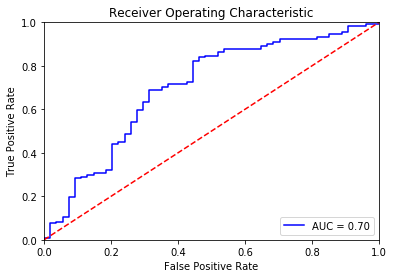

In [48]:
plot_roc_curve(y_test, probs)

# Perform Decision Tree

In [56]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)

In [57]:
dispaly_model_parameters(y_test, y_pred)

Confusion Matrix: 
 [[27 27]
 [33 98]]
Accuracy:  0.6756756756756757
Precision:  0.784
Recall:  0.7480916030534351
f1 score:  0.7656250000000001
roc_auc_score:  0.6240458015267176


In [61]:
probs = dt.predict_proba(X_test)  
probs = probs[:, 1]  
probs

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.])

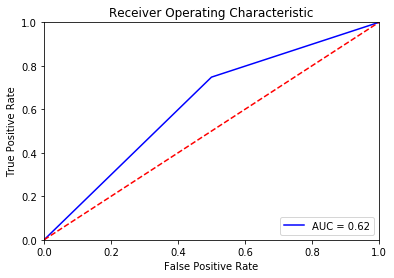

In [62]:
plot_roc_curve(y_test, probs)

# Perform GridSearchCV with Decision Tree

In [63]:
parameters={'criterion':['gini','entropy'],'max_depth': [2,3,4,5]}
clf_tree=DecisionTreeClassifier()
clf=GridSearchCV(clf_tree,parameters)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [64]:
dispaly_model_parameters(y_test, y_pred)

Confusion Matrix: 
 [[ 28  26]
 [ 23 108]]
Accuracy:  0.7351351351351352
Precision:  0.8059701492537313
Recall:  0.8244274809160306
f1 score:  0.8150943396226414
roc_auc_score:  0.6714729997172746


In [65]:
probs = clf.predict_proba(X_test)  
probs = probs[:, 1]  
probs

array([0.78745645, 0.78745645, 0.78745645, 0.78745645, 0.92307692,
       0.29333333, 0.78745645, 0.78745645, 0.78745645, 0.78745645,
       0.78745645, 0.78745645, 0.78745645, 0.78745645, 0.78745645,
       0.78745645, 0.78745645, 0.92307692, 0.29333333, 0.78745645,
       0.78745645, 0.78745645, 0.92307692, 0.29333333, 0.78745645,
       0.78745645, 0.29333333, 0.29333333, 0.78745645, 0.78745645,
       0.29333333, 0.92307692, 0.16666667, 0.29333333, 0.78745645,
       0.29333333, 0.78745645, 0.78745645, 0.78745645, 0.78745645,
       0.78745645, 0.78745645, 0.78745645, 0.78745645, 0.78745645,
       0.92307692, 0.78745645, 0.78745645, 0.78745645, 0.92307692,
       0.92307692, 0.78745645, 0.29333333, 0.78745645, 0.78745645,
       0.29333333, 0.29333333, 0.78745645, 0.29333333, 0.92307692,
       0.29333333, 0.78745645, 0.78745645, 0.78745645, 0.78745645,
       0.92307692, 0.78745645, 0.78745645, 0.92307692, 0.78745645,
       0.29333333, 0.92307692, 0.92307692, 0.78745645, 0.29333

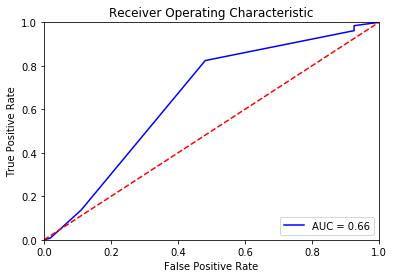

In [66]:
plot_roc_curve(y_test, probs)

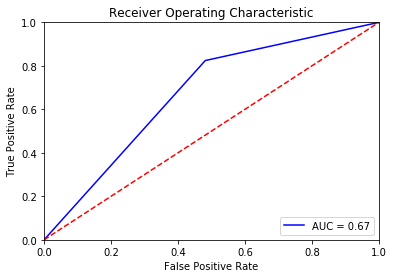

In [68]:
plot_roc_curve(y_test, y_pred)

# Random Forest

In [69]:
rf = RandomForestClassifier(n_estimators=250, random_state = 33)
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

In [70]:
dispaly_model_parameters(y_test, y_pred)

Confusion Matrix: 
 [[ 24  30]
 [ 24 107]]
Accuracy:  0.7081081081081081
Precision:  0.781021897810219
Recall:  0.816793893129771
f1 score:  0.798507462686567
roc_auc_score:  0.6306191687871078


In [71]:
probs = clf.predict_proba(X_test)  
probs = probs[:, 1]  
probs

array([0.78745645, 0.78745645, 0.78745645, 0.78745645, 0.92307692,
       0.29333333, 0.78745645, 0.78745645, 0.78745645, 0.78745645,
       0.78745645, 0.78745645, 0.78745645, 0.78745645, 0.78745645,
       0.78745645, 0.78745645, 0.92307692, 0.29333333, 0.78745645,
       0.78745645, 0.78745645, 0.92307692, 0.29333333, 0.78745645,
       0.78745645, 0.29333333, 0.29333333, 0.78745645, 0.78745645,
       0.29333333, 0.92307692, 0.16666667, 0.29333333, 0.78745645,
       0.29333333, 0.78745645, 0.78745645, 0.78745645, 0.78745645,
       0.78745645, 0.78745645, 0.78745645, 0.78745645, 0.78745645,
       0.92307692, 0.78745645, 0.78745645, 0.78745645, 0.92307692,
       0.92307692, 0.78745645, 0.29333333, 0.78745645, 0.78745645,
       0.29333333, 0.29333333, 0.78745645, 0.29333333, 0.92307692,
       0.29333333, 0.78745645, 0.78745645, 0.78745645, 0.78745645,
       0.92307692, 0.78745645, 0.78745645, 0.92307692, 0.78745645,
       0.29333333, 0.92307692, 0.92307692, 0.78745645, 0.29333

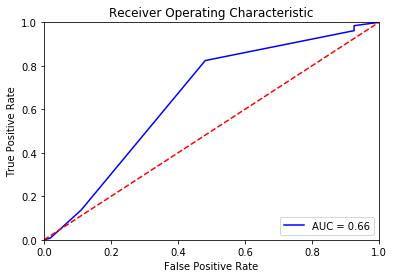

In [72]:
plot_roc_curve(y_test, probs)

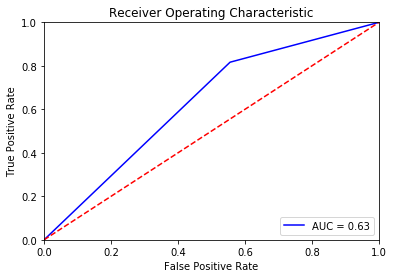

In [73]:
plot_roc_curve(y_test, y_pred)

# AdaBoostClassifier

In [78]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1),n_estimators = 200, algorithm = 'SAMME.R', learning_rate = 0.5, random_state = 42)
ada_clf.fit(X_train,y_train)

y_pred = ada_clf.predict(X_test)


In [79]:
dispaly_model_parameters(y_test, y_pred)

Confusion Matrix: 
 [[ 26  28]
 [ 29 102]]
Accuracy:  0.6918918918918919
Precision:  0.7846153846153846
Recall:  0.7786259541984732
f1 score:  0.7816091954022988
roc_auc_score:  0.6300537178399774


In [83]:
probs = ada_clf.predict_proba(X_test)  
probs = probs[:, 1]  
probs

array([0.50712522, 0.50574213, 0.50143484, 0.50687807, 0.50470989,
       0.49695333, 0.50424691, 0.50114385, 0.50812714, 0.50539065,
       0.50411881, 0.50411507, 0.49929453, 0.50465242, 0.50258535,
       0.50571961, 0.50360853, 0.50603968, 0.49811195, 0.5032259 ,
       0.50356722, 0.5052271 , 0.50460889, 0.51033714, 0.50610908,
       0.50344832, 0.49708372, 0.49233693, 0.5059298 , 0.50194569,
       0.49571535, 0.50623062, 0.50037268, 0.50019579, 0.50555606,
       0.49861687, 0.50444778, 0.50099451, 0.50407328, 0.50460689,
       0.50539065, 0.5038237 , 0.50462228, 0.5057925 , 0.5037439 ,
       0.49784704, 0.50432707, 0.5052271 , 0.50528293, 0.51168143,
       0.49974014, 0.5042161 , 0.4985429 , 0.50611754, 0.50250469,
       0.49868581, 0.49739068, 0.50539065, 0.49852038, 0.50008196,
       0.4970726 , 0.50374987, 0.50394297, 0.50541317, 0.50055118,
       0.49920681, 0.50407328, 0.502019  , 0.50565587, 0.50418658,
       0.49942667, 0.50563351, 0.50417268, 0.50745414, 0.49666

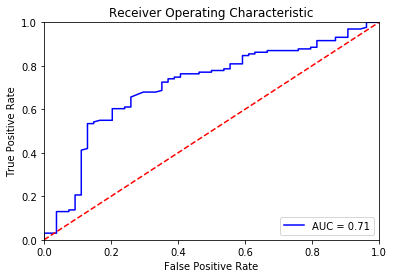

In [84]:
plot_roc_curve(y_test, probs)

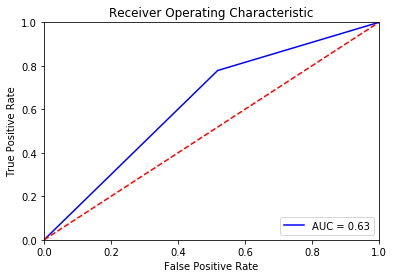

In [85]:
plot_roc_curve(y_test, y_pred)